# Importing Packages

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Reading the Dataset

In [106]:
data=pd.read_csv('UpdatedResumeDataSet.csv')
data.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


# Data Visualization

In [107]:

print(data['Category'].unique())

print("total unique category: {}". format(len(data['Category'].unique())))

['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']
total unique category: 25


In [108]:
print(data['Category'].value_counts())

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='Category'>

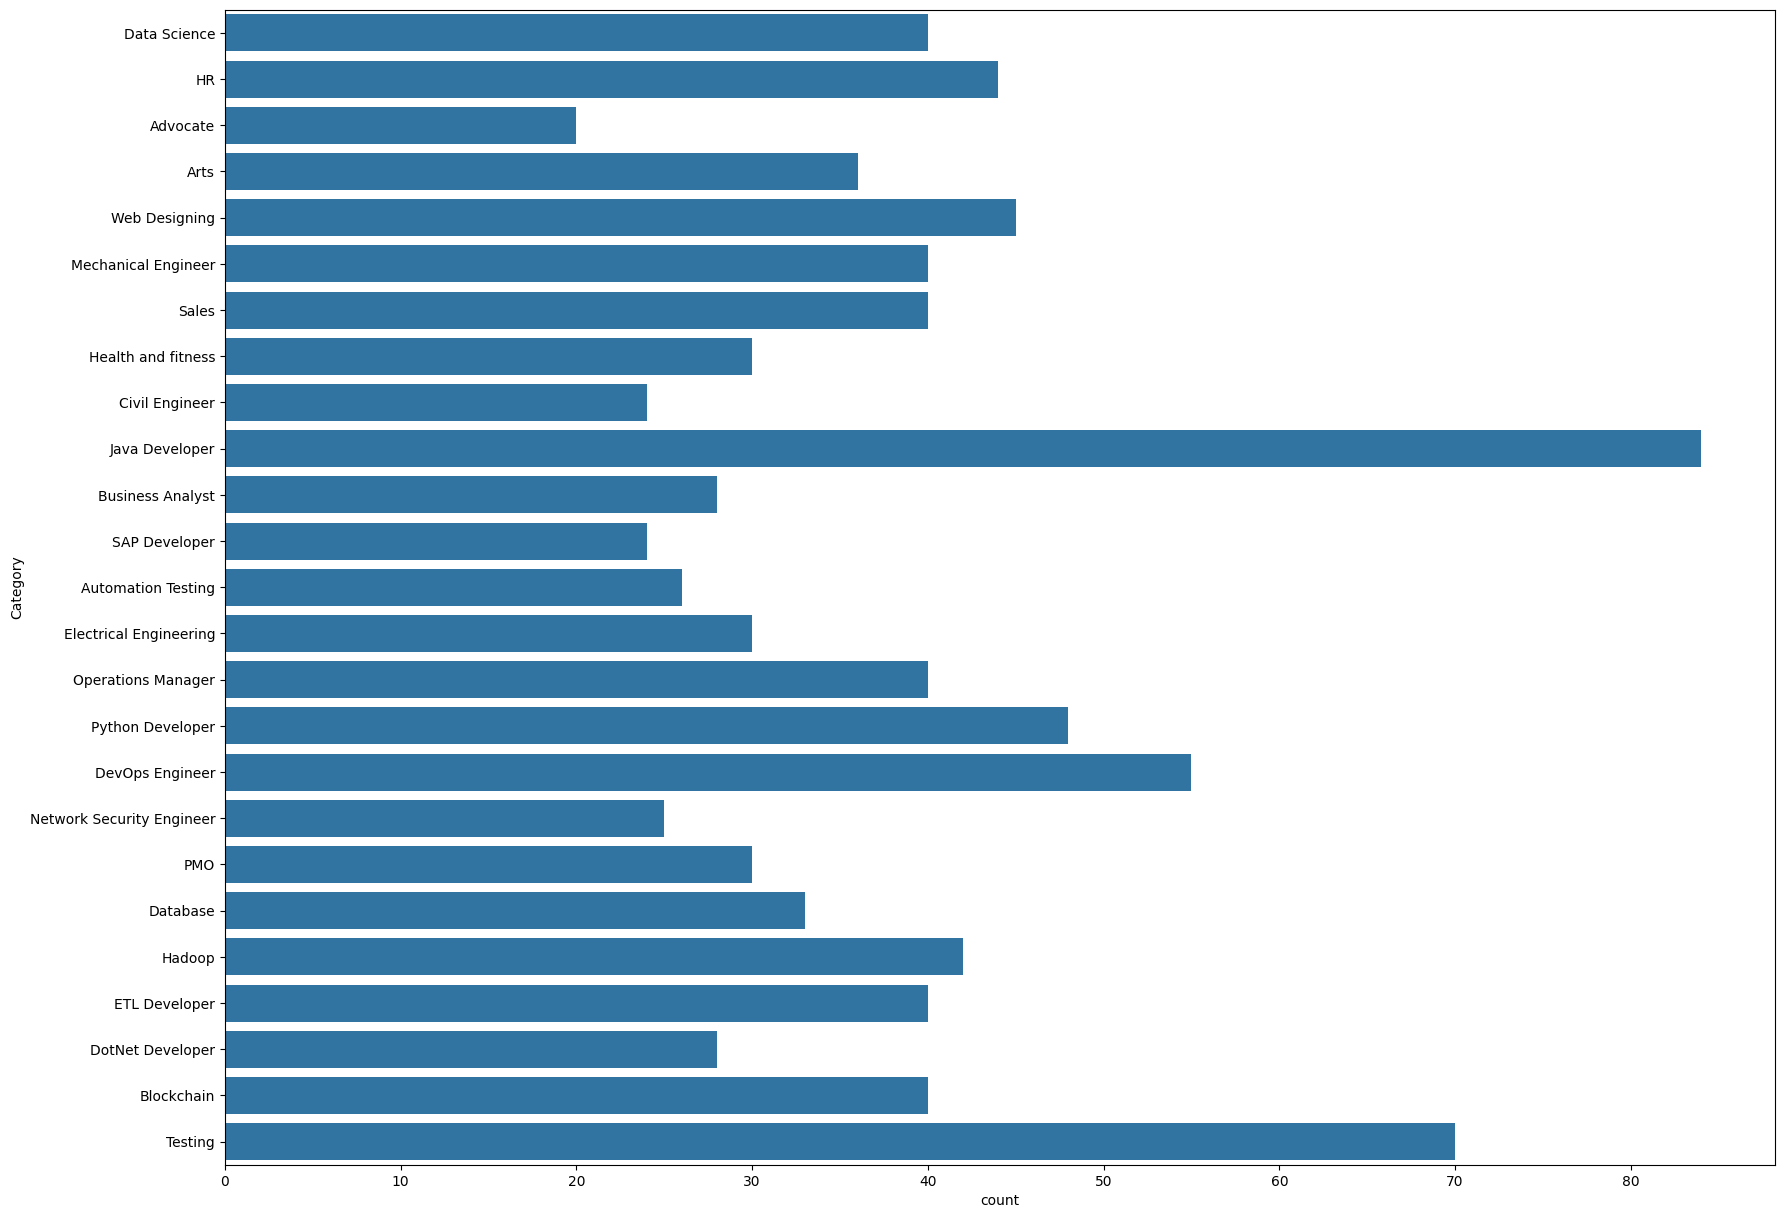

In [109]:
import seaborn as sns

plt.figure(figsize=(20,15))
sns.countplot(y="Category",data=data)

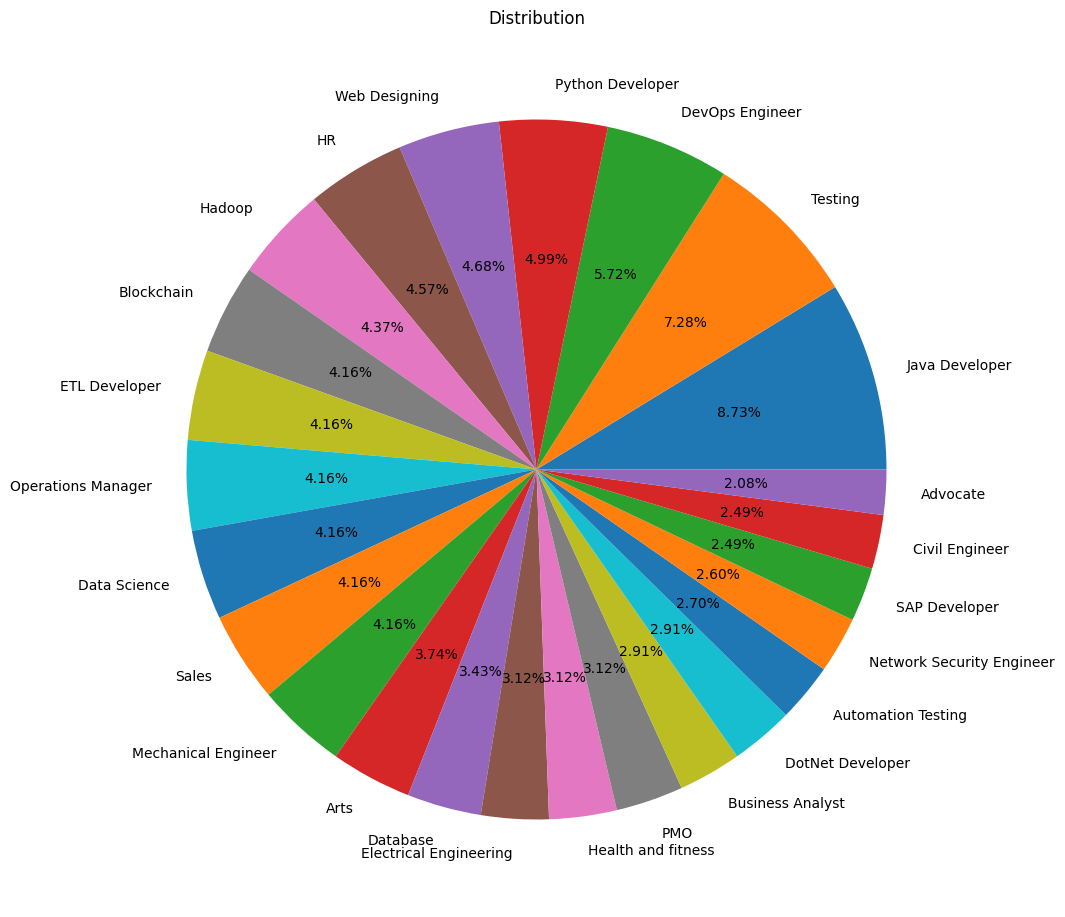

In [110]:
from matplotlib.gridspec import GridSpec
count=data['Category'].value_counts()
label=data['Category'].value_counts().keys()

plt.figure(1, figsize=(25,25))
grid=GridSpec(2,2)

cmap=plt.get_cmap('coolwarm')

color=[cmap(i) for i in np.linspace(0, 1, 5)]
plt.subplot(grid[0,1], aspect=1, title='Distribution')

pie=plt.pie(count, labels=label, autopct='%1.2f%%')
plt.show()

# Processing the Data

In [111]:
import re

def clean(text):
    text=re.sub('http\S+\s*', ' ', text)
    text=re.sub('RT|cc', ' ', text)
    text=re.sub('#\S+', '', text)
    text=re.sub('@\S+', '', text)
    text=re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', text)
    text=re.sub('\s+', ' ', text)
    text=re.sub(r'[^\x00-\x7f]', r' ', text)
    return text

data['clean text']=data.Resume.apply(lambda x: clean(x))

In [112]:
data['clean text']

0      Skills Programming Languages Python pandas num...
1      Education Details May 2013 to May 2017 B E UIT...
2      Areas of Interest Deep Learning Control System...
3      Skills     R     Python     SAP HANA     Table...
4      Education Details MCA YMCAUST Faridabad Haryan...
                             ...                        
957    Computer Skills     Proficient in MS office Wo...
958        Willingness to a ept the challenges     Po...
959    PERSONAL SKILLS     Quick learner     Eagernes...
960    COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...
961    Skill Set OS Windows XP 7 8 8 1 10 Database MY...
Name: clean text, Length: 962, dtype: object

Label Encoding

In [113]:
from sklearn.preprocessing import LabelEncoder

var=['Category']
le=LabelEncoder()

for i in var:
    data[i]=le.fit_transform(data[i])

In [114]:

data

,Category,Resume,clean text
0,6,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,6,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Table...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...
...,...,...,...
957,23,Computer Skills: â¢ Proficient in MS office (...,Computer Skills Proficient in MS office Wo...
958,23,â Willingness to accept the challenges. â ...,Willingness to a ept the challenges Po...
959,23,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",PERSONAL SKILLS Quick learner Eagernes...
960,23,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


Creating token embeddings

In [115]:
import importlib
import tiktoken

print("tiktoken version:", importlib.metadata.version("tiktoken"))

tiktoken version: 0.8.0


In [116]:
tokenizer = tiktoken.get_encoding("gpt2")

In [117]:
data['clean text'] = data['clean text'].astype(str)
text = data['clean text'].values
target=data['Category'].values


In [119]:
# Apply tokenizer.encode to each entry in text individually
embeddings = [tokenizer.encode(t) for t in text]


Applying Padding

In [127]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_length = 100  
padded_embeddings = pad_sequences(embeddings, maxlen=max_length, padding='post', truncating='post')

# Train/Test Split

In [128]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(padded_embeddings, target, random_state=42, test_size=0.2)

In [129]:
strings = [tokenizer.decode(tokens) for tokens in padded_embeddings]


In [130]:
strings

['Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na  ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib gg',
 'Education Details May 2013 to May 2017 B E UIT RGPV Data Scientist Data Scientist Matelabs Skill Details Python Exprience Less than 1 year months Statsmodels Exprience 12 months AWS Exprience Less than 1 year months Machine learning Exprience Less than 1 year months Sklearn Exprience Less than 1 year months Scipy Exprience Less than 1 year months Keras Exprience Less than 1 year monthsCompany Details company Matelabs description ML Platform for business',
 'Areas of Interest Deep Learning Control System Design Programming in Pytho

# Machine Learning Models

In [131]:

import sklearn
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn.fit(x_train, y_train)


KNeighborsClassifier()

In [132]:
prediction=knn.predict(x_test)

In [133]:

print("training Score: {:.2f}".format(knn.score(x_train, y_train)))
print("test Score: {:.2f}".format(knn.score(x_test, y_test)))

training Score: 0.93
test Score: 0.87


In [134]:
from sklearn import metrics
print("model report: %s: \n %s\n" % (knn, metrics.classification_report(y_test, prediction)))

model report: KNeighborsClassifier(): 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       1.00      1.00      1.00         6
           2       0.71      1.00      0.83         5
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         4
           5       1.00      0.22      0.36         9
           6       0.33      0.60      0.43         5
           7       0.33      0.12      0.18         8
           8       1.00      0.93      0.96        14
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         6
          12       0.59      0.83      0.69        12
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         7
          15       0.83      1.00      0.91        15
          16       1.00      1.00      1.

In [158]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rf=RandomForestClassifier()
rf.fit(x_train, y_train)
rf_prediction=rf.predict(x_test)


print("training Score: {:.2f}".format(rf.score(x_train, y_train)))
print("test Score: {:.2f}".format(rf.score(x_test, y_test)))

training Score: 1.00
test Score: 0.98


In [159]:
from sklearn import metrics
print("model report: %s: \n %s\n" % (rf, metrics.classification_report(y_test, rf_prediction)))

model report: RandomForestClassifier(): 
               precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         8
           8       1.00      0.93      0.96        14
           9       1.00      1.00      1.00         5
          10       0.88      1.00      0.93         7
          11       1.00      1.00      1.00         6
          12       0.86      1.00      0.92        12
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         7
          15       1.00      1.00      1.00        15
          16       1.00      1.00      

In [160]:
input_text = ["""Technical Skills Web Technologies: Angular JS, HTML5, CSS3, SASS, Bootstrap, Jquery, Javascript. Software: Brackets, Visual Studio, Photoshop, Visual Studio Code Education Details 
January 2015 B.E CSE Nagpur, Maharashtra G.H.Raisoni College of Engineering
October 2009  Photography Competition Click Nagpur, Maharashtra Maharashtra State Board
    College Magazine OCEAN
Web Designer 

Web Designer - Trust Systems and Software
Skill Details 
PHOTOSHOP- Exprience - 28 months
BOOTSTRAP- Exprience - 6 months
HTML5- Exprience - 6 months
JAVASCRIPT- Exprience - 6 months
CSS3- Exprience - Less than 1 year months
Angular 4- Exprience - Less than 1 year monthsCompany Details 
company - Trust Systems and Software
description - Projects worked on:
1. TrustBank-CBS
Project Description: TrustBank-CBS is a core banking solution by Trust Systems.
Roles and Responsibility:
Ã¢Â—Â Renovated complete UI to make it more modern, user-friendly, maintainable and optimised for bank use.
Ã¢Â—Â Shared the UI structure and guidelines to be incorporated, with development team of around 50
members.
Ã¢Â—Â Achieved the target of project completion in given time frame.
Ã¢Â—Â Made required graphics for the project in photoshop

2. Loan Bazar (Loan Appraisal)
Project Description: Loan Bazar is a MVC-based application dedicated to creating and managing
loan applications. The goal of this application is to streamline the process of loan application and integrate with existing CBS.
Roles and Responsibility
Ã¢Â—Â Designed and developed modern and responsive UI of entire application and achieved the target in given time frame.
Ã¢Â—Â Made required graphics for the project in photoshop
3. Capital Security Bond Application
Project Description: Capital Security Bond Application is a MVC based application which provided an online platform to purchase gold bond
Roles and Responsibility:
Ã¢Â—Â Designed and developed modern and responsive UI of entire application and achieved the target in given time frame.
Ã¢Â—Â Made required graphics for the project in photoshop

4. SoftGST
Project Description: SoftGST (Web Based Application) is an ASP application to every tax
payers and its vendors for generating the GSTR returns on the basis of sales / purchase
data, additionally the application can do the reconciliation of GSTR 2 A with purchase register.
Roles and Responsibility:
Ã¢Â—Â Designed and developed the UI of Dashboard.

5. Trust Analytica:
Project Description: Trust Analytika is the mobile web app that shows bank asset, liability,
income, expenses.
Roles and Responsibility:
Ã¢Â—Â Designed and developed the landing page of the application.
Ã¢Â—Â Supported the developers in UI implementation

6. Website's:
Project Name:
1. TSR Technology Services - http://tsrtechnologyservices.com
2. Vidarbha Merchants Urban Co-Op Bank - http://vmcbank.com
3. GISSS - http://gisss.co.in
4. Softtrust USA - http://softtrustusa.com
Roles and Responsibility
Ã¢Â—Â Communicated with clients to understand their requirement
Ã¢Â—Â Made mocks for the website
Ã¢Â—Â Designed and developed complete website and hosted them in stipulated time.
company - www.jalloshband.com
description - Project Name:
1. Jallosh Band - www.jalloshband.com
2. An Endeavor Foundation
Roles and Responsibility:
Ã¢Â—Â Communicated with clients to understand their requirement
Ã¢Â—Â Made mocks for the website
Ã¢Â—Â Designed and developed complete website and hosted them in stipulated time.
company - 10MagicalFingers
description - National and international client interaction.
Ã¢Â—Â Management of digital data"
"""]
input_embeddings = [tokenizer.encode(t) for t in input_text]
# Pad the sequence to match the model's input length
max_length = 100  # Should match the padding length used during training
input_padded = pad_sequences(input_embeddings, maxlen=max_length, padding='post', truncating='post')

# Convert to a numpy array (already in the correct shape for prediction)
input_padded = np.array(input_padded)

# Make the prediction
prediction = rf.predict(input_padded)

# Convert the prediction (integer) back to the original category label
predicted_label = le.inverse_transform(prediction)
print(predicted_label)


['Web Designing']
